In [8]:
import numpy as np
import os
import glob
import allantools
import matplotlib.pyplot as plt
from tqdm import tqdm

import counts_statistics_qpe as cs
import phase_estimation_functions as qpe
import verification_functions as verif
from densitymatrix import DM

# import numdifftools as nd
# import numpy.linalg as lg
# import scipy.optimize as sp

In [21]:
####################### VERIFICATION ANALYSIS #################
data_dir = r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\with_Certification"
#filenames = ["COMPLETE_QPE_FIRST_RUN", "COMPLETE_QPE_SECOND_RUN", "COMPLETE_QPE_THIRD_RUN", "COMPLETE_QPE_FOURTH_RUN", "COMPLETE_QPE_FIFTH_RUN", "COMPLETE_QPE_SIXTH_RUN"]
#filenames = ["COMPLETE_QPE_BELL_FIRST_RUN_20250129175719","COMPLETE_QPE_BELL_SECOND_RUN_20250129230913","COMPLETE_QPE_BELL_THIRD_RUN_20250203010747"]
filenames = [i for i in glob.glob("QPE*")]
os.chdir(data_dir)
n_qubits = 4
input_state = "Plus" #"Bell" or "GHZ" # This will specify in which folder we want to save the figures
fail_mean = [[0.0019, 0.0176, 0.031],[0.0016, 0.0039, 0.0019],[0.0005, 0.0008, 0.0012],[0.0066, 0.0228, 0.0191]]

In [24]:
"""
Reading and analysing the stats files
"""
# n_rounds=30
# stats = {}

# for file in filenames:
#     stats[file] = []
#     for i in range(n_rounds):
#         stats_dir = f"{data_dir}\{file}\statistics\\v_round={i}"
#         stats[file].append(cs.Read_Operator_Statistics(stats_dir))

'\nReading and analysing the stats files\n'

In [5]:
"""
Reading and analysing the stats files
"""
n_rounds=30
qtys = ["n_samples", "n_samples_error", "p_pass", "p_pass_error"]
samples_evolution = np.arange(1, 1e4, 1)
p_fail_evolution = np.zeros((len(filenames), n_rounds, int(1e4)))
p_fail_error_evolution = np.zeros((len(filenames), n_rounds, int(1e4)))

for index, file in enumerate(filenames):
    for i in tqdm(range(n_rounds)):
        stats_dir = f"{data_dir}\{file}\stats_verif_bottom\\v_round={i}"
        for qty in qtys:
            with open(f"{stats_dir}\\{qty}.txt", "r") as f:
                # It reads each qtys.txt file and writes its content as variable qtys[i]_list;
                # eg.: p_pass_list and n_samples_list used bellow in the cell are defined here
                var_name = f"{qty}_list"
                locals()[var_name] = list(map(float,list(f.read().strip("[").strip("]").split(","))))
        p_fail_evolution[index][i] = 1 - np.array(p_pass_list, dtype=float)
        p_fail_error_evolution[index][i] = np.array(p_pass_error_list, dtype=float)

NameError: name 'np' is not defined

In [6]:
##### Get data from the verification #####
final_p_fail_max = []
final_p_fail_mean = []
final_p_fail_mean_error = []

significance_data = []
lamb = 1/2
delta = 0.01
final_epsilons = []

for index, file in enumerate(filenames):
    final_p_fail_max.append(np.round(np.max(p_fail_evolution[index], axis = 0)[-1], 4))
    final_p_fail_mean.append(np.round(np.average(p_fail_evolution[index], axis = 0)[-1], 4))
    final_p_fail_mean_error.append(np.round(np.sqrt(np.sum(p_fail_error_evolution[index]**2, axis = 0)[-1])/30, 4))

    epsilon = np.round(verif.get_epsilon(lamb, delta, 1e4, final_p_fail_max[index], 0.06).x[0], 4)
    final_epsilons.append(epsilon)

final_p_fail_mean = np.array(final_p_fail_mean, dtype = float)
final_p_fail_error_mean = np.array(final_p_fail_mean_error, dtype = float)
print(f"Max value of final failure rate (over all 30 rounds), for each combination of angles: \n{final_p_fail_max}")
print(f"Mean value of final failure rate (over all 30 rounds), for each combination of angles: \n{final_p_fail_mean}")
print(f"Max value of epsilon (over all 30 rounds), for each combination of angles: \n{final_epsilons}")

NameError: name 'filenames' is not defined

In [22]:
"""
CALCULATING THE STATISTICS OBTAINED FROM THE XXXX MEASUREMENTS
"""
stabilizers = ["xxxx"]
stab_sign = [-1]

input_state = "Plus" # or GHZ # This will specify in which folder we want to save the figures
n_rounds = 30
samples_evolution = np.arange(1, n_rounds+1, 1)
stats_list = {"file_1":{}, "file_2":{}, "file_3":{}}

p_pass = np.zeros((4, len(filenames), n_rounds))
p_pass_error = np.zeros((4, len(filenames), n_rounds))

for index, file in enumerate(filenames):    
    # pair = 0 refers to top pair and pair = 1 refers to bottom pair
    for pair in range(4):
        STABILIZER_TO_INDEX = {stab: i for i, stab in enumerate(stabilizers)}
        file_dir = f"{data_dir}\{file}\counts"
        os.chdir(file_dir)

        files = [i for i in glob.glob("Phase*.txt")]
        ### This assumes the label is of the form: "PhaseEstimation=xxxx_{index}_{theta_4}"
        files.sort(key = lambda x: int((x.split("_")[2]).split(".")[0]))

        stats = cs.Operartors_Statistics(n_qubits, stabilizers, stab_sign, STABILIZER_TO_INDEX, files, file_dir, input_state, str(pair)) #Set_loops = 1?
        stats_list[f"file_{index+1}"][pair] = stats

        p_pass_list, n_samples_list = stats.get_pass_prob_evolution(samples_evolution)
        
        p_pass[pair][index] = np.array(p_pass_list, dtype = float)
        p_pass_error[pair][index] = np.array(stats.p_pass_error_list, dtype = float)
    
p_fail = 1 - p_pass
p_fail_error = p_pass_error

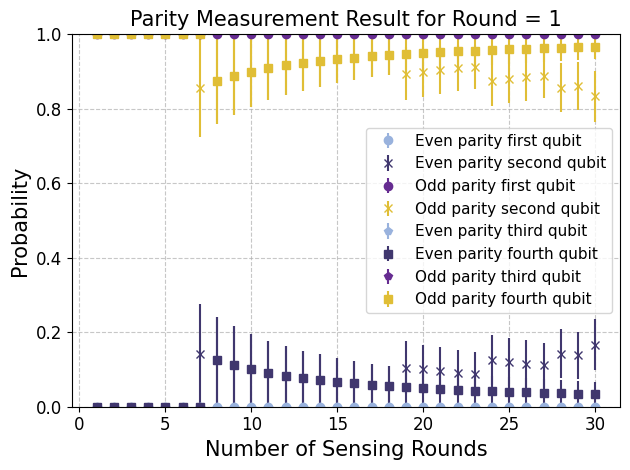

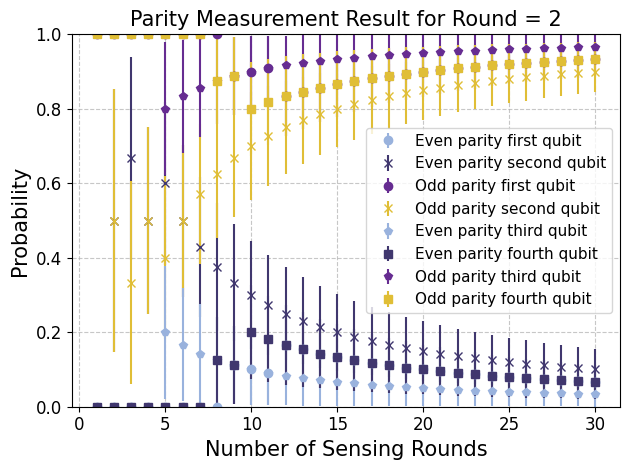

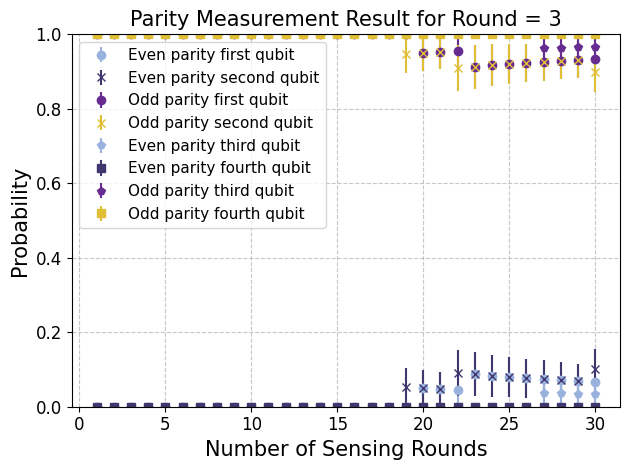

In [14]:
colors = ["#99B2DD","#662C91","#40376E","#E0BE36"]
for index, file in enumerate(filenames):
    plt.errorbar(samples_evolution, p_pass[0][index], p_pass_error[0][index], color=colors[0], fmt='o', label = "Even parity first qubit")
    plt.errorbar(samples_evolution, p_pass[1][index], p_pass_error[1][index], color=colors[2], fmt='x', label = "Even parity second qubit")
    plt.errorbar(samples_evolution, p_fail[0][index], p_fail_error[0][index], color=colors[1], fmt='o', label = "Odd parity first qubit")
    plt.errorbar(samples_evolution, p_fail[1][index], p_fail_error[1][index], color=colors[3], fmt='x', label = "Odd parity second qubit")
    plt.errorbar(samples_evolution, p_pass[2][index], p_pass_error[2][index], color=colors[0], fmt='p', label = "Even parity third qubit")
    plt.errorbar(samples_evolution, p_pass[3][index], p_pass_error[3][index], color=colors[2], fmt='s', label = "Even parity fourth qubit")
    plt.errorbar(samples_evolution, p_fail[2][index], p_fail_error[2][index], color=colors[1], fmt='p', label = "Odd parity third qubit")
    plt.errorbar(samples_evolution, p_fail[3][index], p_fail_error[3][index], color=colors[3], fmt='s', label = "Odd parity fourth qubit")

    plt.xlabel("Number of Sensing Rounds", fontsize=15)
    plt.ylabel("Probability", fontsize=15)
    plt.title(f"Parity Measurement Result for Round = {index+1}", fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(0,1)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=11, markerscale=1.)
    plt.tight_layout()
    plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\with_Certification\Parity_Measurement_Graph\Short_sensing_p_evol_r={index+1}")
    plt.show()

In [23]:
"""
ESTIMATION OF THETA: WITH THE VISIBILITY AND DENSITY MATRIX METHODS
IT SAVES ALL THE RELEVANT PARAMS IN thetas_mle DICTIONARY
"""
mle = {}
thetas_mle = {0 :{"v": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((4,3))}},
              "dm": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((4,3))}}},
            1 :{"v": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((4,3))}},
              "dm": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((4,3))}}},
            2 :{"v": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((4,3))}},
              "dm": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((4,3))}}},
            3 :{"v": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((4,3))}},
              "dm": {"sum": {"values": np.zeros(3), "variance": np.zeros(3), "fisher_info": np.zeros(3)},
                    "indiv": {"values": np.zeros((4,3)), "variance": np.zeros((2,3)), "fisher_info": np.zeros((4,3))}}}}

def generate_angles_in_radians(n):
    x = []
    """
    Génère 4 angles aléatoires en radians, chacun étant compris entre 0 et π/2,
    et dont la somme est exactement égale à π/2.
    """
    for i in range(n):
        target_sum = np.pi / 2  # Somme cible
        angles = np.sort(np.random.uniform(-np.pi/2, target_sum, 1))  # Générer 3 points de coupure aléatoires
        
        # Calculer les 4 angles en prenant les différences successives
        a1 = angles[0]
        a4 = target_sum - angles[0]  # Assurer que la somme soit bien égale à π/2

        x.append(a1)

    return x

def set_estimation_params(estimator_class, dic, index, a_vectors_list):
    mle = estimator_class
    estimation_results = mle.get_theta(get_cov = True, set_lim = None).x

    dic["sum"]["values"][index] = np.array(np.sum(estimation_results))
    dic["sum"]["variance"][index] = np.array(mle.get_variance(np.array([1])))
    dic["sum"]["fisher_info"][index] = np.array(mle.fisher_bound/n_rounds)

### Vector list to extract the estimation of the indifivual params
a_vectors_list = np.array([1])

x0 = generate_angles_in_radians(20)

plus = (np.array([1,0])+np.array([0,1]))/np.sqrt(2)
plusmatrix = np.array(np.outer(plus, np.conjugate(plus)))

dm_folder = [i for i in glob.glob(r"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\QST\SHORT\Run*")]
QST_file = []
for index, file in enumerate(dm_folder):
    os.chdir(file)
    QST_file.append(glob.glob("QST_*")[0])
density_matrix = {k:{} for k in QST_file}
for index, file in enumerate(dm_folder):
    os.chdir(f'{file}\\{QST_file[index]}')
    with open('density_TOP.npy','rb') as f:
        density_top = np.load(f)
        density_matrix[f'{QST_file[index]}'][0] = qpe.partial_trace(density_top,A=True,B=False)
        density_matrix[f'{QST_file[index]}'][1] = qpe.partial_trace(density_top,A=False,B=True)
    with open('density_BOTTOM.npy','rb') as g:
        density_bottom = np.load(g)
        density_matrix[f'{QST_file[index]}'][2] = qpe.partial_trace(density_bottom,A=True,B=False)
        density_matrix[f'{QST_file[index]}'][3] = qpe.partial_trace(density_bottom,A=False,B=True)
input_state = 'Plus'


input_state = 'Plus'
for index, file in enumerate(filenames):
    v = [1 - fail_mean[0][index],1 - fail_mean[1][index],1 - fail_mean[2][index],1 - fail_mean[3][index]]
    bnds = ((-np.pi/2,np.pi/2),)
    for i in range(4):
        dm = plusmatrix
        meas_stats = stats_list[f"file_{index+1}"][i]
        ##### Theta estimation and saving params in dictionary #####
        mle[file] = qpe.Estimator(input_state, i, meas_stats, x0, bnds, "visibility", v[i])
        set_estimation_params(mle[file], thetas_mle[i]["v"], index, a_vectors_list)
        mle[file].set_function_type("density_matrix", dm)
        set_estimation_params(mle[file], thetas_mle[i]["dm"], index, a_vectors_list)

c:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Analysis_code\QuantumPhaseEstimation\Laura_test\phase_estimation_functions.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
  sub[0][0] = matrixA_B[0][0] + matrixA_B[1][1]
c:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Analysis_code\QuantumPhaseEstimation\Laura_test\phase_estimation_functions.py:31: ComplexWarning: Casting complex values to real discards the imaginary part
  sub[0][1] = matrixA_B[0][2] + matrixA_B[1][3]
c:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Analysis_code\QuantumPhaseEstimation\Laura_test\phase_estimation_functions.py:32: ComplexWarning: Casting complex values to real discards the imaginary part
  sub[1][0] = matrixA_B[2][0] + matrixA_B[3][1]
c:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Analysis_code\QuantumPhaseEstimation\Laura_test\phase_estimation_functions.py:33: ComplexWarning: Casting complex values to real discards the

In [1]:
print(thetas_mle[0]["v"]["sum"]["values"]*180/np.pi)
print(thetas_mle[1]["v"]["sum"]["values"]*180/np.pi)
print(thetas_mle[2]["v"]["sum"]["values"]*180/np.pi)
print(thetas_mle[3]['v']["sum"]["values"]*180/np.pi)

NameError: name 'thetas_mle' is not defined

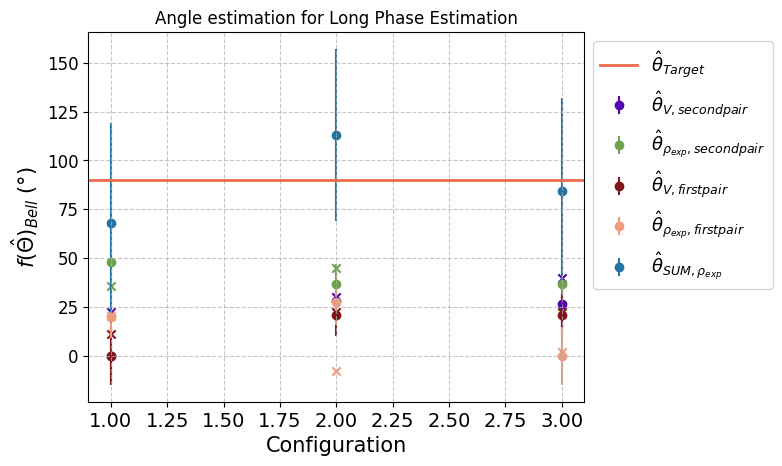

In [28]:
colors = ["#EE6C4D", "#5603AD", "#6DA34D", "#81171B", "#F19C79", "#2274A5"]
x_data = [1, 2, 3]

target_angles = {'RUN_1' : [np.pi/8,np.pi/5,np.pi/16,0.3534291735288517],
                 'RUN_2' : [np.pi/6,np.pi/4,np.pi/8,-0.13089969389957457],
                 'RUN_3' : [2*np.pi/9,np.pi/7,np.pi/8,0.03116659378]}

target_sums = {"0": [(target_angles['RUN_1'][0])*180/np.pi,
                        (target_angles['RUN_2'][0])*180/np.pi,
                        (target_angles['RUN_3'][0])*180/np.pi],
                "1": [(target_angles['RUN_1'][1])*180/np.pi,
                        (target_angles['RUN_2'][1])*180/np.pi,
                        (target_angles['RUN_3'][1])*180/np.pi],
                "2": [(target_angles['RUN_1'][2])*180/np.pi,
                        (target_angles['RUN_2'][2])*180/np.pi,
                        (target_angles['RUN_3'][2])*180/np.pi],
                "3": [(target_angles['RUN_1'][3])*180/np.pi,
                        (target_angles['RUN_2'][3])*180/np.pi,
                        (target_angles['RUN_3'][3])*180/np.pi]}

plt.figure(figsize=(6.4, 4.8))
plt.errorbar(x_data, thetas_mle[0]["v"]["sum"]["values"]*180/np.pi,thetas_mle[0]["v"]["sum"]["variance"]*180/np.pi, color=colors[1], label = r"$\hat{\theta}_{V,second pair}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, thetas_mle[1]["v"]["sum"]["values"]*180/np.pi,thetas_mle[1]["v"]["sum"]["variance"]*180/np.pi, color=colors[2], label = r"$\hat{\theta}_{\rho_{exp},second pair}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, thetas_mle[2]["v"]["sum"]["values"]*180/np.pi,thetas_mle[2]["v"]["sum"]["variance"]*180/np.pi, color=colors[3], label = r"$\hat{\theta}_{V,first pair}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, thetas_mle[3]["v"]["sum"]["values"]*180/np.pi,thetas_mle[3]["v"]["sum"]["variance"]*180/np.pi, color=colors[4], label = r"$\hat{\theta}_{\rho_{exp},first pair}$", marker = 'o', linestyle = "",zorder=1)

plt.errorbar(x_data, (thetas_mle[0]["v"]["sum"]["values"]+thetas_mle[1]["v"]["sum"]["values"]+thetas_mle[2]["v"]["sum"]["values"]+thetas_mle[3]["v"]["sum"]["values"])*180/np.pi,(thetas_mle[1]["v"]["sum"]["variance"]+thetas_mle[0]["v"]["sum"]["variance"]+thetas_mle[2]["v"]["sum"]["variance"]+thetas_mle[3]["v"]["sum"]["variance"])*180/np.pi, color=colors[5], label = r"$\hat{\theta}_{SUM,\rho_{exp}}$", marker = 'o', linestyle = "",zorder=1)
plt.axhline(np.pi/2*180/np.pi, color=colors[0], linestyle='-', label=r"$\hat{\theta}_{Target}$", linewidth=2)
for i in range((len(target_sums))):
    plt.scatter(x_data,target_sums[str(i)],marker='x',color = colors[i+1],zorder=0)



plt.xlabel("Configuration", fontsize=15)
plt.ylabel(r"$f(\hat{\Theta})_{Bell}$ (°)", fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=14)
plt.legend(fontsize=13, markerscale=1.,loc='upper left',bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.title("Angle estimation for Long Phase Estimation")
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\with_Certification\Angle_Short_Phase_Estimation_visibility", bbox_inches='tight')
plt.show()

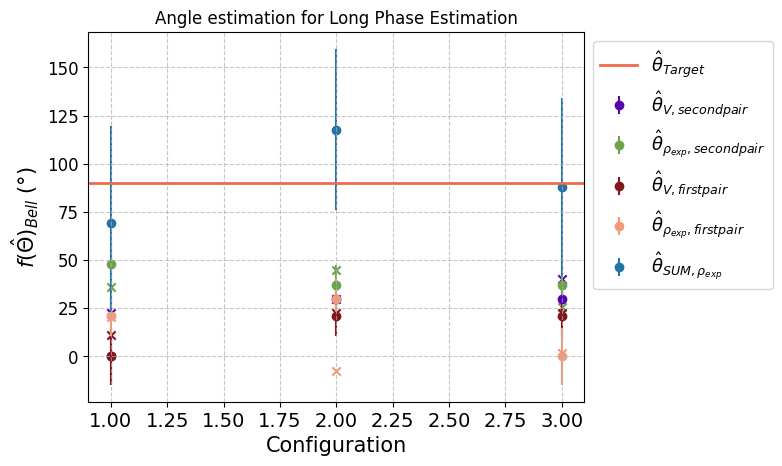

In [27]:
colors = ["#EE6C4D", "#5603AD", "#6DA34D", "#81171B", "#F19C79", "#2274A5"]
x_data = [1, 2, 3]



plt.figure(figsize=(6.4, 4.8))
plt.errorbar(x_data, thetas_mle[0]["dm"]["sum"]["values"]*180/np.pi,thetas_mle[0]["dm"]["sum"]["variance"]*180/np.pi, color=colors[1], label = r"$\hat{\theta}_{V,second pair}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, thetas_mle[1]["dm"]["sum"]["values"]*180/np.pi,thetas_mle[1]["dm"]["sum"]["variance"]*180/np.pi, color=colors[2], label = r"$\hat{\theta}_{\rho_{exp},second pair}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, thetas_mle[2]["dm"]["sum"]["values"]*180/np.pi,thetas_mle[2]["dm"]["sum"]["variance"]*180/np.pi, color=colors[3], label = r"$\hat{\theta}_{V,first pair}$", marker = 'o', linestyle = "",zorder=1)
plt.errorbar(x_data, thetas_mle[3]["dm"]["sum"]["values"]*180/np.pi,thetas_mle[3]["dm"]["sum"]["variance"]*180/np.pi, color=colors[4], label = r"$\hat{\theta}_{\rho_{exp},first pair}$", marker = 'o', linestyle = "",zorder=1)

plt.errorbar(x_data, (thetas_mle[0]["dm"]["sum"]["values"]+thetas_mle[1]["dm"]["sum"]["values"]+thetas_mle[2]["dm"]["sum"]["values"]+thetas_mle[3]["dm"]["sum"]["values"])*180/np.pi,(thetas_mle[1]["dm"]["sum"]["variance"]+thetas_mle[0]["dm"]["sum"]["variance"]+thetas_mle[2]["dm"]["sum"]["variance"]+thetas_mle[3]["dm"]["sum"]["variance"])*180/np.pi, color=colors[5], label = r"$\hat{\theta}_{SUM,\rho_{exp}}$", marker = 'o', linestyle = "",zorder=1)
plt.axhline(np.pi/2*180/np.pi, color=colors[0], linestyle='-', label=r"$\hat{\theta}_{Target}$", linewidth=2)
for i in range((len(target_sums))):
    plt.scatter(x_data,target_sums[str(i)],marker='x',color = colors[i+1],zorder=0)



plt.xlabel("Configuration", fontsize=15)
plt.ylabel(r"$f(\hat{\Theta})_{Bell}$ (°)", fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=14)
plt.legend(fontsize=13, markerscale=1.,loc='upper left',bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.title("Angle estimation for Long Phase Estimation")
plt.savefig(rf"C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\FOR PUBLICATION\Private_QPE_paper\Plus\with_Certification\Angle_Short_Phase_Estimation_dm", bbox_inches='tight')
plt.show()